In [11]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

import numpy as np 

%matplotlib inline

def Unique_Column(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

df = pd.read_csv("dataset.csv")

df.drop("customerID", axis = "columns", inplace = True)

pd.to_numeric(df.TotalCharges, errors="coerce")
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

df1 = df[df.TotalCharges!=' ']
df1.loc[:, "TotalCharges"] = pd.to_numeric(df1["TotalCharges"])


df1 = df1.copy()
df1 = df1.replace({"No internet service": "No", "No phone service": "No"}).infer_objects(copy = False)

Y_N_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Churn']

df1.loc[:, Y_N_cols] = df1.loc[:, Y_N_cols].replace({"Yes": 1, "No": 0}).infer_objects(copy=False).astype("Int64")


df2 = pd.get_dummies(data = df1,columns= ['InternetService', 'PaymentMethod', 'Contract'], dtype="Int64")
df2.sample(5)
df2.dtypes

scaler = MinMaxScaler()
Cols_Scale = ["tenure", "MonthlyCharges", "TotalCharges"]
df2[Cols_Scale] = scaler.fit_transform(df2[Cols_Scale])
df2.sample(5)


,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
574,0.380282,0,1,1,1,0.921393,0.367598,0,0,1,0,0,0,1,0,1,0,0
4745,0.464789,0,0,1,0,0.817910,0.391859,0,0,1,0,0,0,1,0,1,0,0
2974,0.380282,1,1,0,0,0.758706,0.304708,1,0,1,0,0,1,0,0,1,0,0
4876,0.126761,1,1,1,0,0.857214,0.122623,1,0,1,0,0,0,1,0,1,0,0
4356,0.028169,0,0,0,0,0.005473,0.004293,0,0,0,1,0,0,0,1,1,0,0


In [2]:
from sklearn.model_selection import train_test_split

X = df2.drop("Churn", axis = "columns")
Y = df2["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
X_train.shape

(5625, 17)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

X_train_np = X_train.to_numpy().astype("float32") if hasattr(X_train, "to_numpy") else np.asarray(X_train, dtype="float32")
Y_train_np = Y_train.to_numpy().astype("float32") if hasattr(Y_train, "to_numpy") else np.asarray(Y_train, dtype="float32")

model = keras.Sequential([
    keras.layers.Dense(17, input_shape=(17,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_np, Y_train_np, epochs=100)


Epoch 1/100


C:\Users\MANTHAN BENGANI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7509 - loss: 0.5280
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.7936 - loss: 0.4336
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7943 - loss: 0.4260
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8018 - loss: 0.4200
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8009 - loss: 0.4168
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8034 - loss: 0.4156
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8018 - loss: 0.4135
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.8037 - loss: 0.4130
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8032 - loss: 0.4112
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.8043 - loss: 0.4097
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8050 - loss: 0.4102
Epoch 12/100
176/176 ━━━━━━━━━━

Test loss: 0.4628291130065918
Test accuracy: 0.7825160026550293
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       999
         1.0       0.66      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

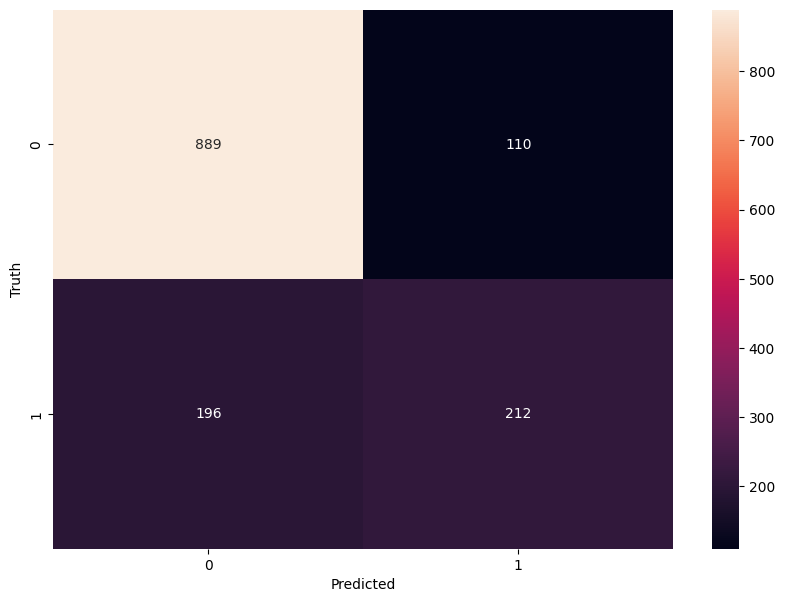

In [4]:
X_test_np = X_test.to_numpy().astype("float32") if hasattr(X_test, "to_numpy") else np.asarray(X_test, dtype="float32")
Y_test_np = Y_test.to_numpy().astype("float32") if hasattr(Y_test, "to_numpy") else np.asarray(Y_test, dtype="float32")

loss, acc = model.evaluate(X_test_np, Y_test_np, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", acc)

yp = model.predict(X_test_np)

Y_preds = []
for i in yp:
    if i > 0.5:
        Y_preds.append(1)
    else:
        Y_preds.append(0)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test_np, Y_preds))

import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test_np, predictions= Y_preds)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

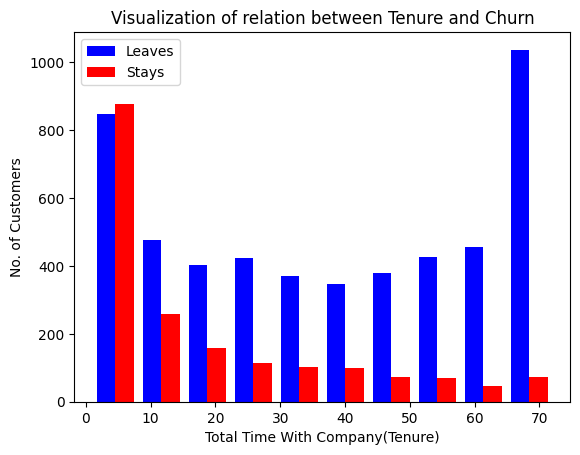

In [5]:
tenure_churn_leaves = df1[df1.Churn == 0].tenure
tenure_churn_Stays = df1[df1.Churn == 1].tenure


plt.hist([tenure_churn_leaves, tenure_churn_Stays], color = ['Blue', 'Red'],label = ["Leaves", "Stays"])
plt.xlabel("Total Time With Company(Tenure)")
plt.ylabel("No. of Customers")
plt.title("Visualization of relation between Tenure and Churn")
plt.legend()

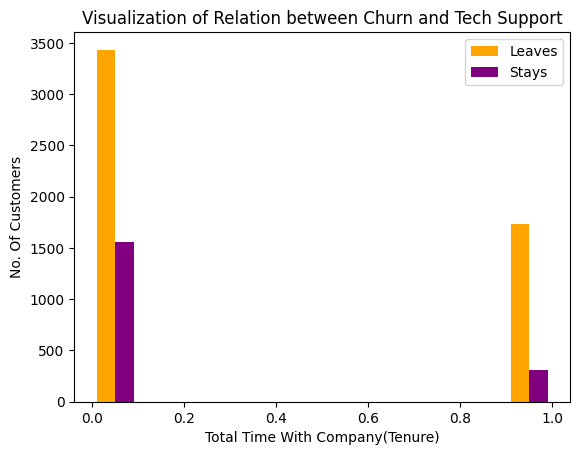

In [6]:
Support_Churn_Leaves = df1.loc[df1.Churn == 0, 'TechSupport']
Support_Churn_Stays  = df1.loc[df1.Churn == 1, 'TechSupport']

plt.hist([Support_Churn_Leaves, Support_Churn_Stays], color = ['Orange', 'Purple'], label = ['Leaves', 'Stays'])
plt.xlabel("Total Time With Company(Tenure)")
plt.ylabel("No. Of Customers")
plt.title("Visualization of Relation between Churn and Tech Support")
plt.legend()

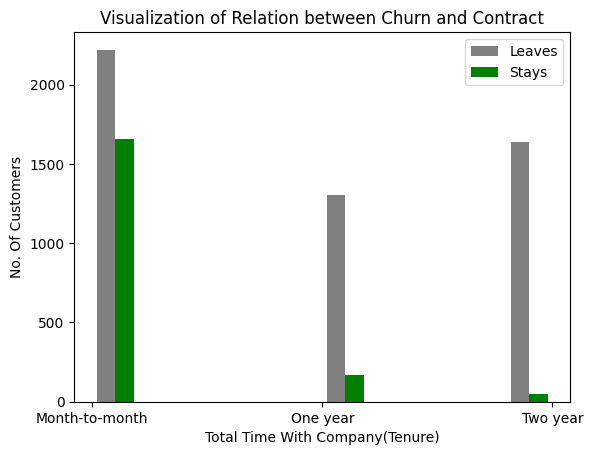

In [7]:
Contract_Churn_Leaves = df1.loc[df1.Churn == 0, 'Contract']
Contract_Churn_Stays  = df1.loc[df1.Churn == 1, 'Contract']

plt.hist([Contract_Churn_Leaves, Contract_Churn_Stays], color = ['Grey', 'Green'], label = ['Leaves', 'Stays'])
plt.xlabel("Total Time With Company(Tenure)")
plt.ylabel("No. Of Customers")
plt.title("Visualization of Relation between Churn and Contract")
plt.legend()

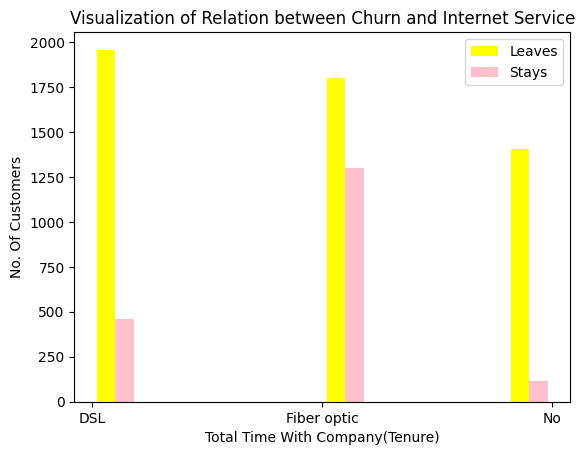

In [8]:
InternetService_Churn_Leaves = df1.loc[df1.Churn == 0, 'InternetService']
InternetService_Churn_Stays  = df1.loc[df1.Churn == 1, 'InternetService']

plt.hist([InternetService_Churn_Leaves, InternetService_Churn_Stays], color = ['Yellow', 'Pink'], label = ['Leaves', 'Stays'])
plt.xlabel("Total Time With Company(Tenure)")
plt.ylabel("No. Of Customers")
plt.title("Visualization of Relation between Churn and Internet Service")
plt.legend()

In [10]:
pd.set_option('future.no_silent_downcasting', True)